Download aligned youtube face: https://www.cs.tau.ac.il/~wolf/ytfaces/

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

root = "./aligned_images_DB"

In [4]:
def get_subjects(root):
    subjects = {}
    for subject in os.listdir(root):
        root_subject = os.path.join(root, subject)
        video_frames = []
        for video in os.listdir(root_subject):
            root_subject_video = os.path.join(root_subject, video)
            if os.path.isdir(root_subject_video):
                video_frames += [os.path.join(video, frame) for frame in os.listdir(root_subject_video)]
        subjects[subject] = video_frames
    return subjects

subjects = get_subjects(root)

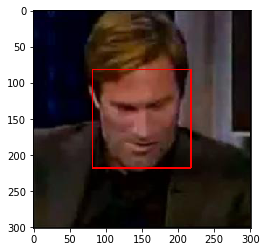

In [9]:
def get_bbox(path):
    image = Image.open(path)
    img_w, img_h = image.size
    w = int(img_w / 2.2)
    h = int(img_h / 2.2)
    x1 = img_w // 2 - w // 2
    y1 = img_h // 2 - h // 2
    x2 = img_w // 2 + w // 2
    y2 = img_h // 2 + h // 2
    bbox = (x1, y1, x2, y2)
    return np.array(image), bbox

def viz_bbox(image, bbox):
    x1, y1, x2, y2 = bbox
    color = (255, 0, 0)
    o = 1
    image[y1-o:y1+o, x1:x2, :] = color
    image[y2-o:y2+o, x1:x2, :] = color
    image[y1:y2, x1-o:x1+o, :] = color
    image[y1:y2, x2-o:x2+o, :] = color
    plt.imshow(image)
    plt.show()
    
image, bbox = get_bbox(root + '/Aaron_Eckhart/0/aligned_detect_0.555.jpg')
viz_bbox(image, bbox)

Write all bbox info csv file, the header is ``Filename;Width;Height;X1;Y1;X2;Y2``

In [10]:
def write_bbox(subjects):
    for subject, video_frames in subjects.items():
        print(subject)
        csv_path = os.path.join(root, subject, subject+".csv")
        with open(csv_path, 'w') as f:
            f.write('Filename;Width;Height;X1;Y1;X2;Y2\n')
            for video_frame in video_frames:
                image_path = os.path.join(root, subject, video_frame)
                image, bbox = get_bbox(image_path)
                H, W, _ = image.shape
                if bbox is None:
                    continue
                entry = [video_frame.replace('\\', '/'), W, H, *bbox]
                entry = ';'.join([str(e) for e in entry])
                f.write(entry + '\n')
        
write_bbox(subjects)

Abdullah
Abid_Hamid_Mahmud_Al-Tikriti
Abraham_Foxman
Adriana_Lima
Adriana_Perez_Navarro
Adrian_Fernandez
Adrien_Brody
Ahmed_Qureia
Ahmet_Necdet_Sezer
Akbar_Hashemi_Rafsanjani
Akhmed_Zakayev
Alanna_Ubach
Alecos_Markides
Alex_Zanardi
Alicia_Keys
Ali_Khamenei
Allison_Janney
Alvaro_Noboa
Amanda_Marsh
Amelie_Mauresmo
Amram_Mitzna
Anders_Ebbeson
Andres_DAlessandro
Andrew_Firestone
Andrew_Luster
Andre_Bucher
Andy_Garcia
Angela_Merkel
Angie_Arzola
Anibal_Ibarra
Barbara_Becker
Barry_Hinson
Beatrice_Dalle
Benjamin_Bratt
Bernard_Siegel
Bertie_Ahern
Bill_Cartwright
Bill_Herrion
Brennon_Leighton
Brian_Billick
Cabas
Calbert_Cheaney
Candice_Bergen
Carla_Tricoli
Carlos_Alberto
Carlos_Moya
Carlton_Dotson
Carmen_Electra
Carroll_Weimer
Catherine_Bell
Catherine_Deneuve
Catherine_Ndereba
Chakib_Khelil
Charles_Mathews
Charles_Rogers
Charles_Tannok
Charlie_Hunnam
Chelsea_Clinton
Chen_Kaige
Chen_Shui-bian
Cheryl_Hines
Christian_Gimenez
Christian_Malcolm
Christian_Olsson
Christopher_Matero
Christoph_Daum
Chris